![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-ocr-workshop/blob/master/tutorials/Certification_Trainings_JSL/1.2.Image_processing.ipynb)

## Blogposts and videos

- [Text Detection in Spark OCR](https://medium.com/spark-nlp/text-detection-in-spark-ocr-dcd8002bdc97)

- [Table Detection & Extraction in Spark OCR](https://medium.com/spark-nlp/table-detection-extraction-in-spark-ocr-50765c6cedc9)

- [Extract Tabular Data from PDF in Spark OCR](https://medium.com/spark-nlp/extract-tabular-data-from-pdf-in-spark-ocr-b02136bc0fcb)

- [Signature Detection in Spark OCR](https://medium.com/spark-nlp/signature-detection-in-spark-ocr-32f9e6f91e3c)

- [GPU image pre-processing in Spark OCR](https://medium.com/spark-nlp/gpu-image-pre-processing-in-spark-ocr-3-1-0-6fc27560a9bb)

- [How to Setup Spark OCR on UBUNTU - Video](https://www.youtube.com/watch?v=cmt4WIcL0nI)


**More examples here**

https://github.com/JohnSnowLabs/spark-ocr-workshop

### Colab Setup

In [1]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
!pip install -q johnsnowlabs 

You should consider upgrading via the '/usr/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [2]:
from johnsnowlabs import nlp, visual

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
nlp.install(refresh_install=True, visual=True)

ðŸš¨ Spark-Healthcare installation seems broken, there was an exception while importing it. It will not be available on the jsl.xx module
You can run  jsl.install(refresh_install=True, force_browser=True)  to re-install latest version. 
ðŸš¨ Enterprise Finance installation seems broken, there was an exception while importing it. It will not be available on the jsl.xx module
You can run  jsl.install(refresh_install=True, force_browser=True)  to re-install latest version. 
ðŸš¨ Enterprise Finance installation seems broken, there was an exception while importing it. It will not be available on the jsl.xx module
You can run  jsl.install(refresh_install=True, force_browser=True)  to re-install latest version. 
ðŸš¨ Outdated Medical Secrets in license file. Version=4.2.2 but should be Version=4.2.4
ðŸ“‹ Loading license number 0 from /home/jose/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
ðŸ‘Œ JSL-Home is up to date! 
ðŸ‘Œ Everything is already installed, no cha

In [3]:
from johnsnowlabs import nlp, visual
import pandas as pd

# Automatically load license data and start a session with all jars user has access to
spark = nlp.start(visual=True)

ðŸ‘Œ Launched cpu optimized session with with: ðŸš€Spark-NLP==4.2.4, ðŸ’ŠSpark-Healthcare==4.2.4, ðŸ•¶Spark-OCR==4.2.4, running on âš¡ PySpark==3.1.2


In [4]:
import pkg_resources

from pyspark.ml import PipelineModel
from pyspark.sql import functions as F

## Read image


    Image #0:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


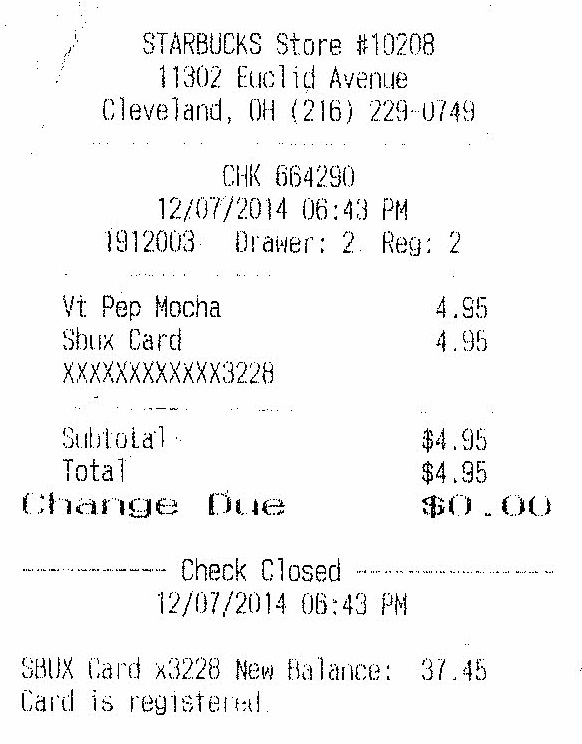

In [5]:
image_path = pkg_resources.resource_filename('sparkocr', 'resources/ocr/images/check.jpg')
image_example_df = spark.read.format("binaryFile").load(image_path)
image_df = visual.BinaryToImage().transform(image_example_df).cache()

visual.display_images(image_df)

## Scaling


    Image #0:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


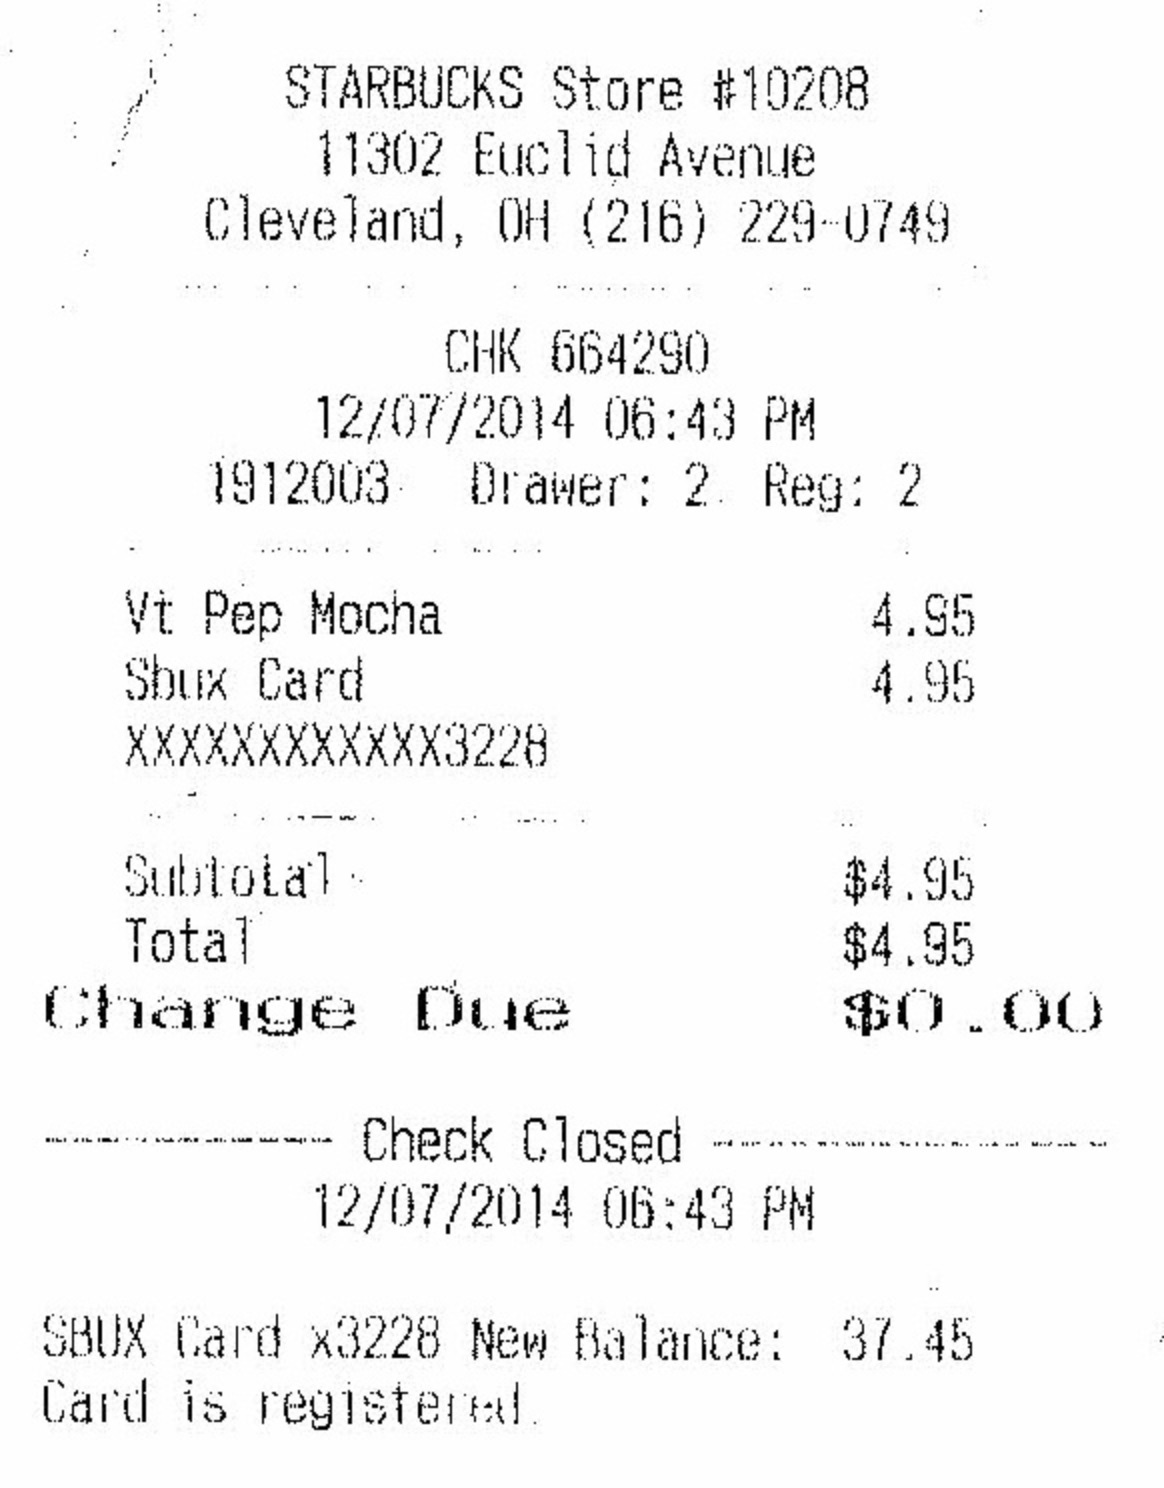

In [6]:
scaled_image_df = visual.ImageTransformer() \
    .addScalingTransform(2) \
    .setInputCol("image") \
    .setOutputCol("scaled_image") \
    .setImageType(visual.ImageType.TYPE_BYTE_GRAY) \
    .transform(image_df)

visual.display_images(scaled_image_df, "scaled_image")

## Image Adaptive Thresholding


    Image #0:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


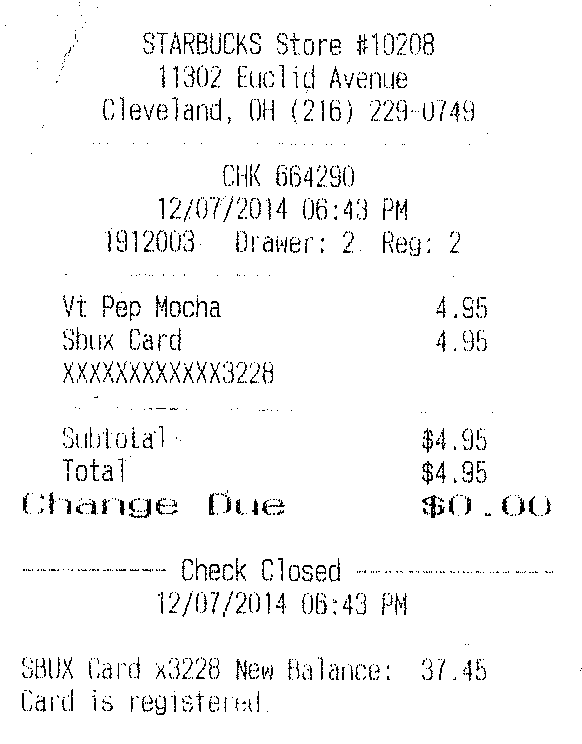

In [7]:
thresholded_image = visual.ImageTransformer() \
    .addAdaptiveThreshold(21, 20)\
    .setInputCol("image") \
    .setOutputCol("thresholded_image") \
    .transform(image_df)

visual.display_images(thresholded_image, "thresholded_image")

## Erosion


    Image #0:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


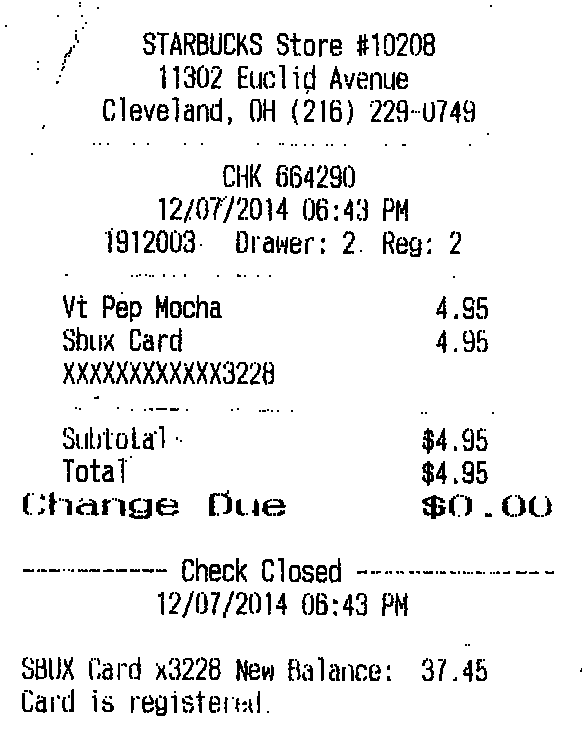

In [8]:
eroded_image = visual.ImageTransformer() \
.addErodeTransform(2,2)\
.setInputCol("image") \
.setOutputCol("eroded_image") \
.transform(image_df)

visual.display_images(eroded_image, "eroded_image")

## Dilation


    Image #0:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


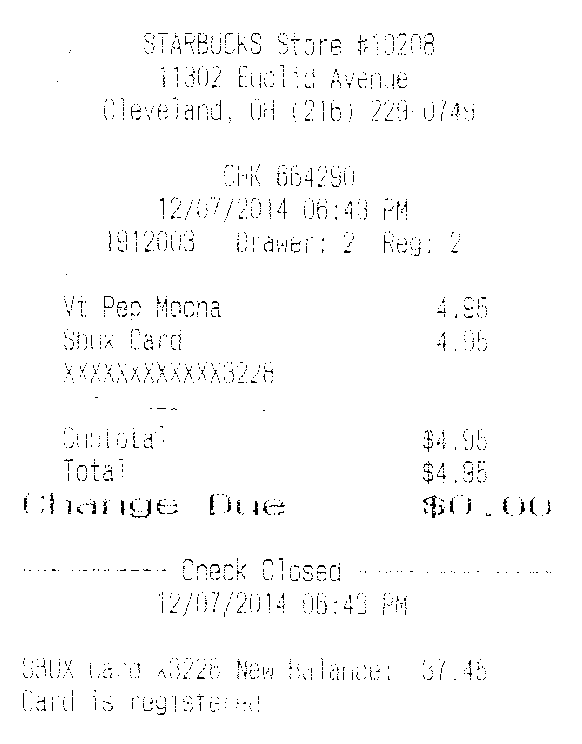

In [9]:
dilated_image = visual.ImageTransformer() \
.addDilateTransform(1, 2)\
.setInputCol("image") \
.setOutputCol("dilated_image") \
.transform(image_df)

visual.display_images(dilated_image, "dilated_image")

## Remove Objects


    Image #0:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


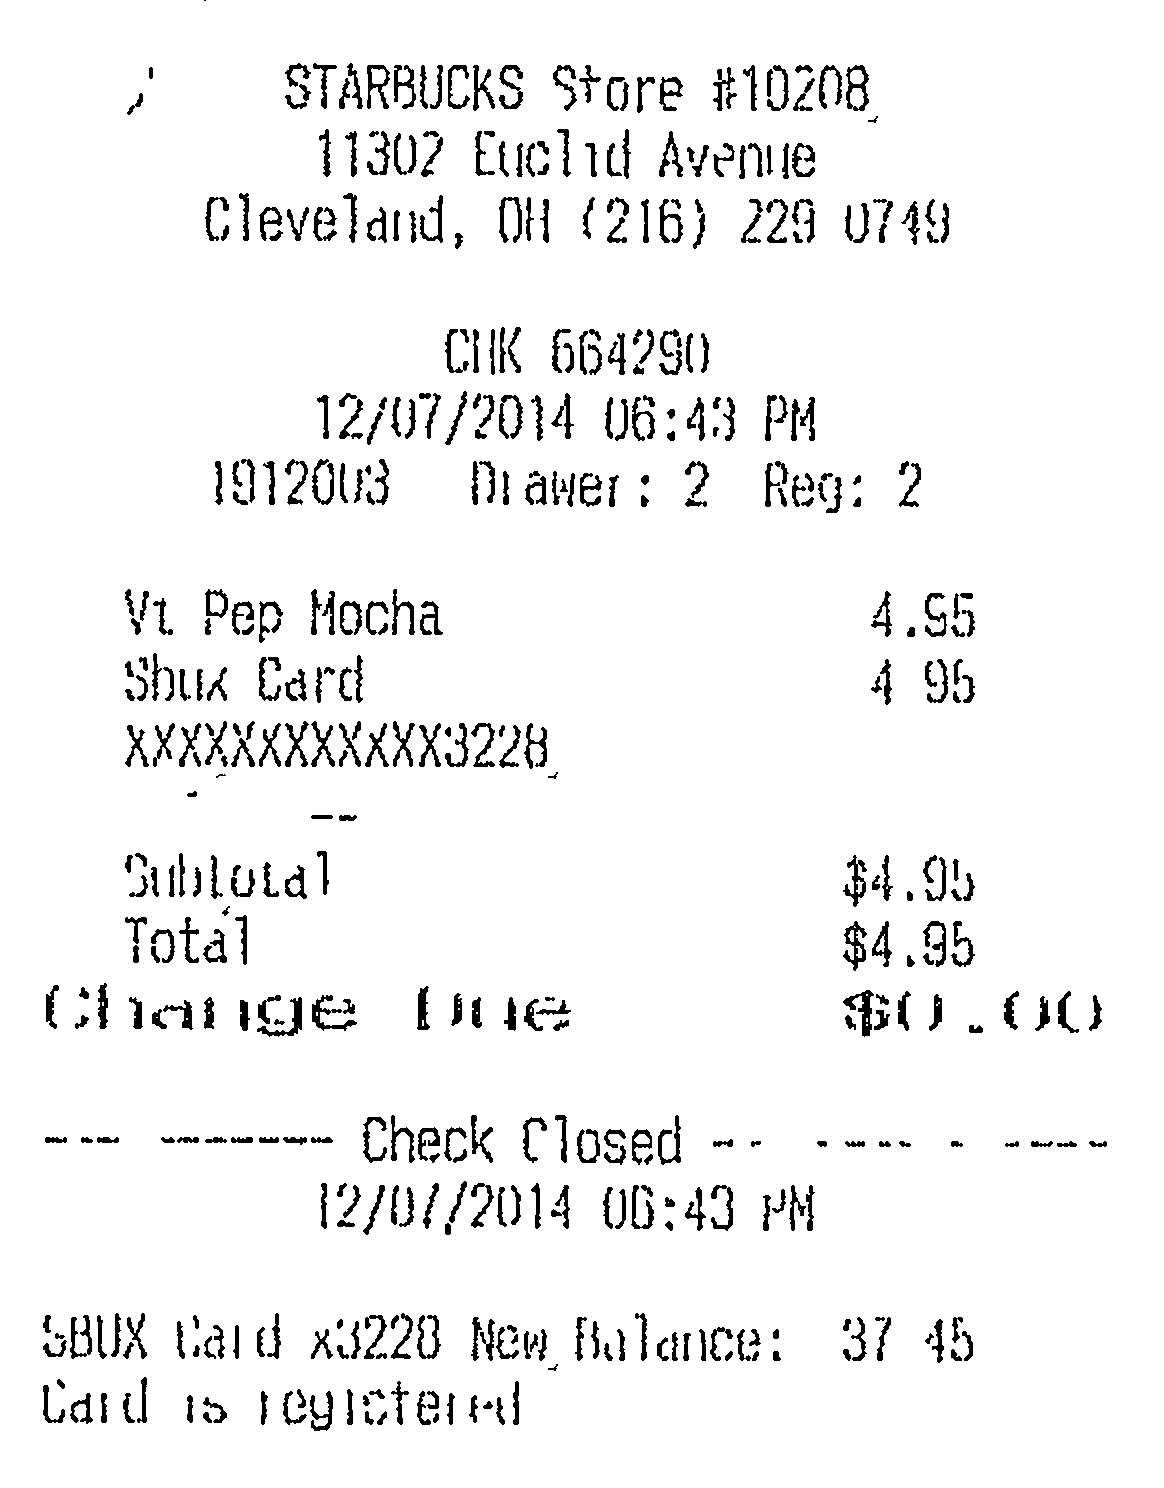

In [10]:
corrected_image = visual.ImageTransformer() \
    .addScalingTransform(2) \
    .addAdaptiveThreshold(31, 2)\
    .addRemoveObjects(10, 500) \
    .setInputCol("image") \
    .setOutputCol("corrected_image") \
    .transform(image_df)

visual.display_images(corrected_image, "corrected_image")

## Median Blur


    Image #0:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


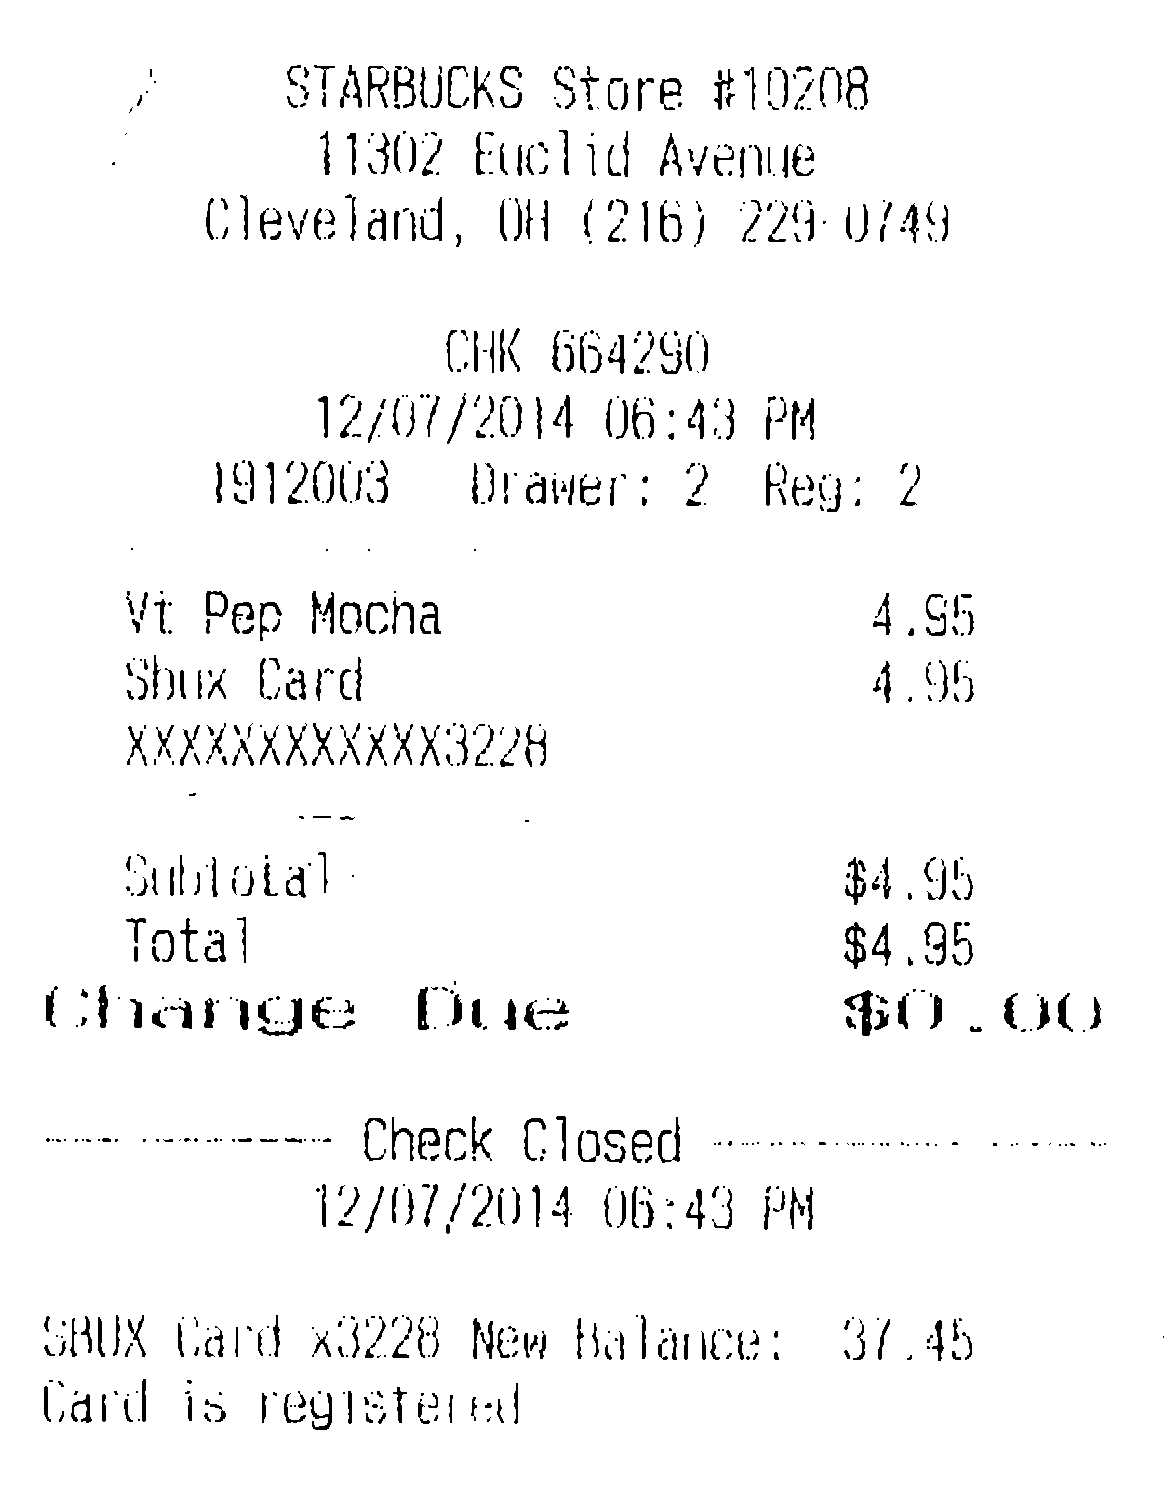

In [11]:
corrected_image = visual.ImageTransformer() \
    .addScalingTransform(2) \
    .addMedianBlur(3) \
    .setInputCol("image") \
    .setOutputCol("corrected_image") \
    .transform(image_df)

visual.display_images(corrected_image, "corrected_image")

## GPU Image transformation


    Image #0:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 4656 px
    Height: 5952 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


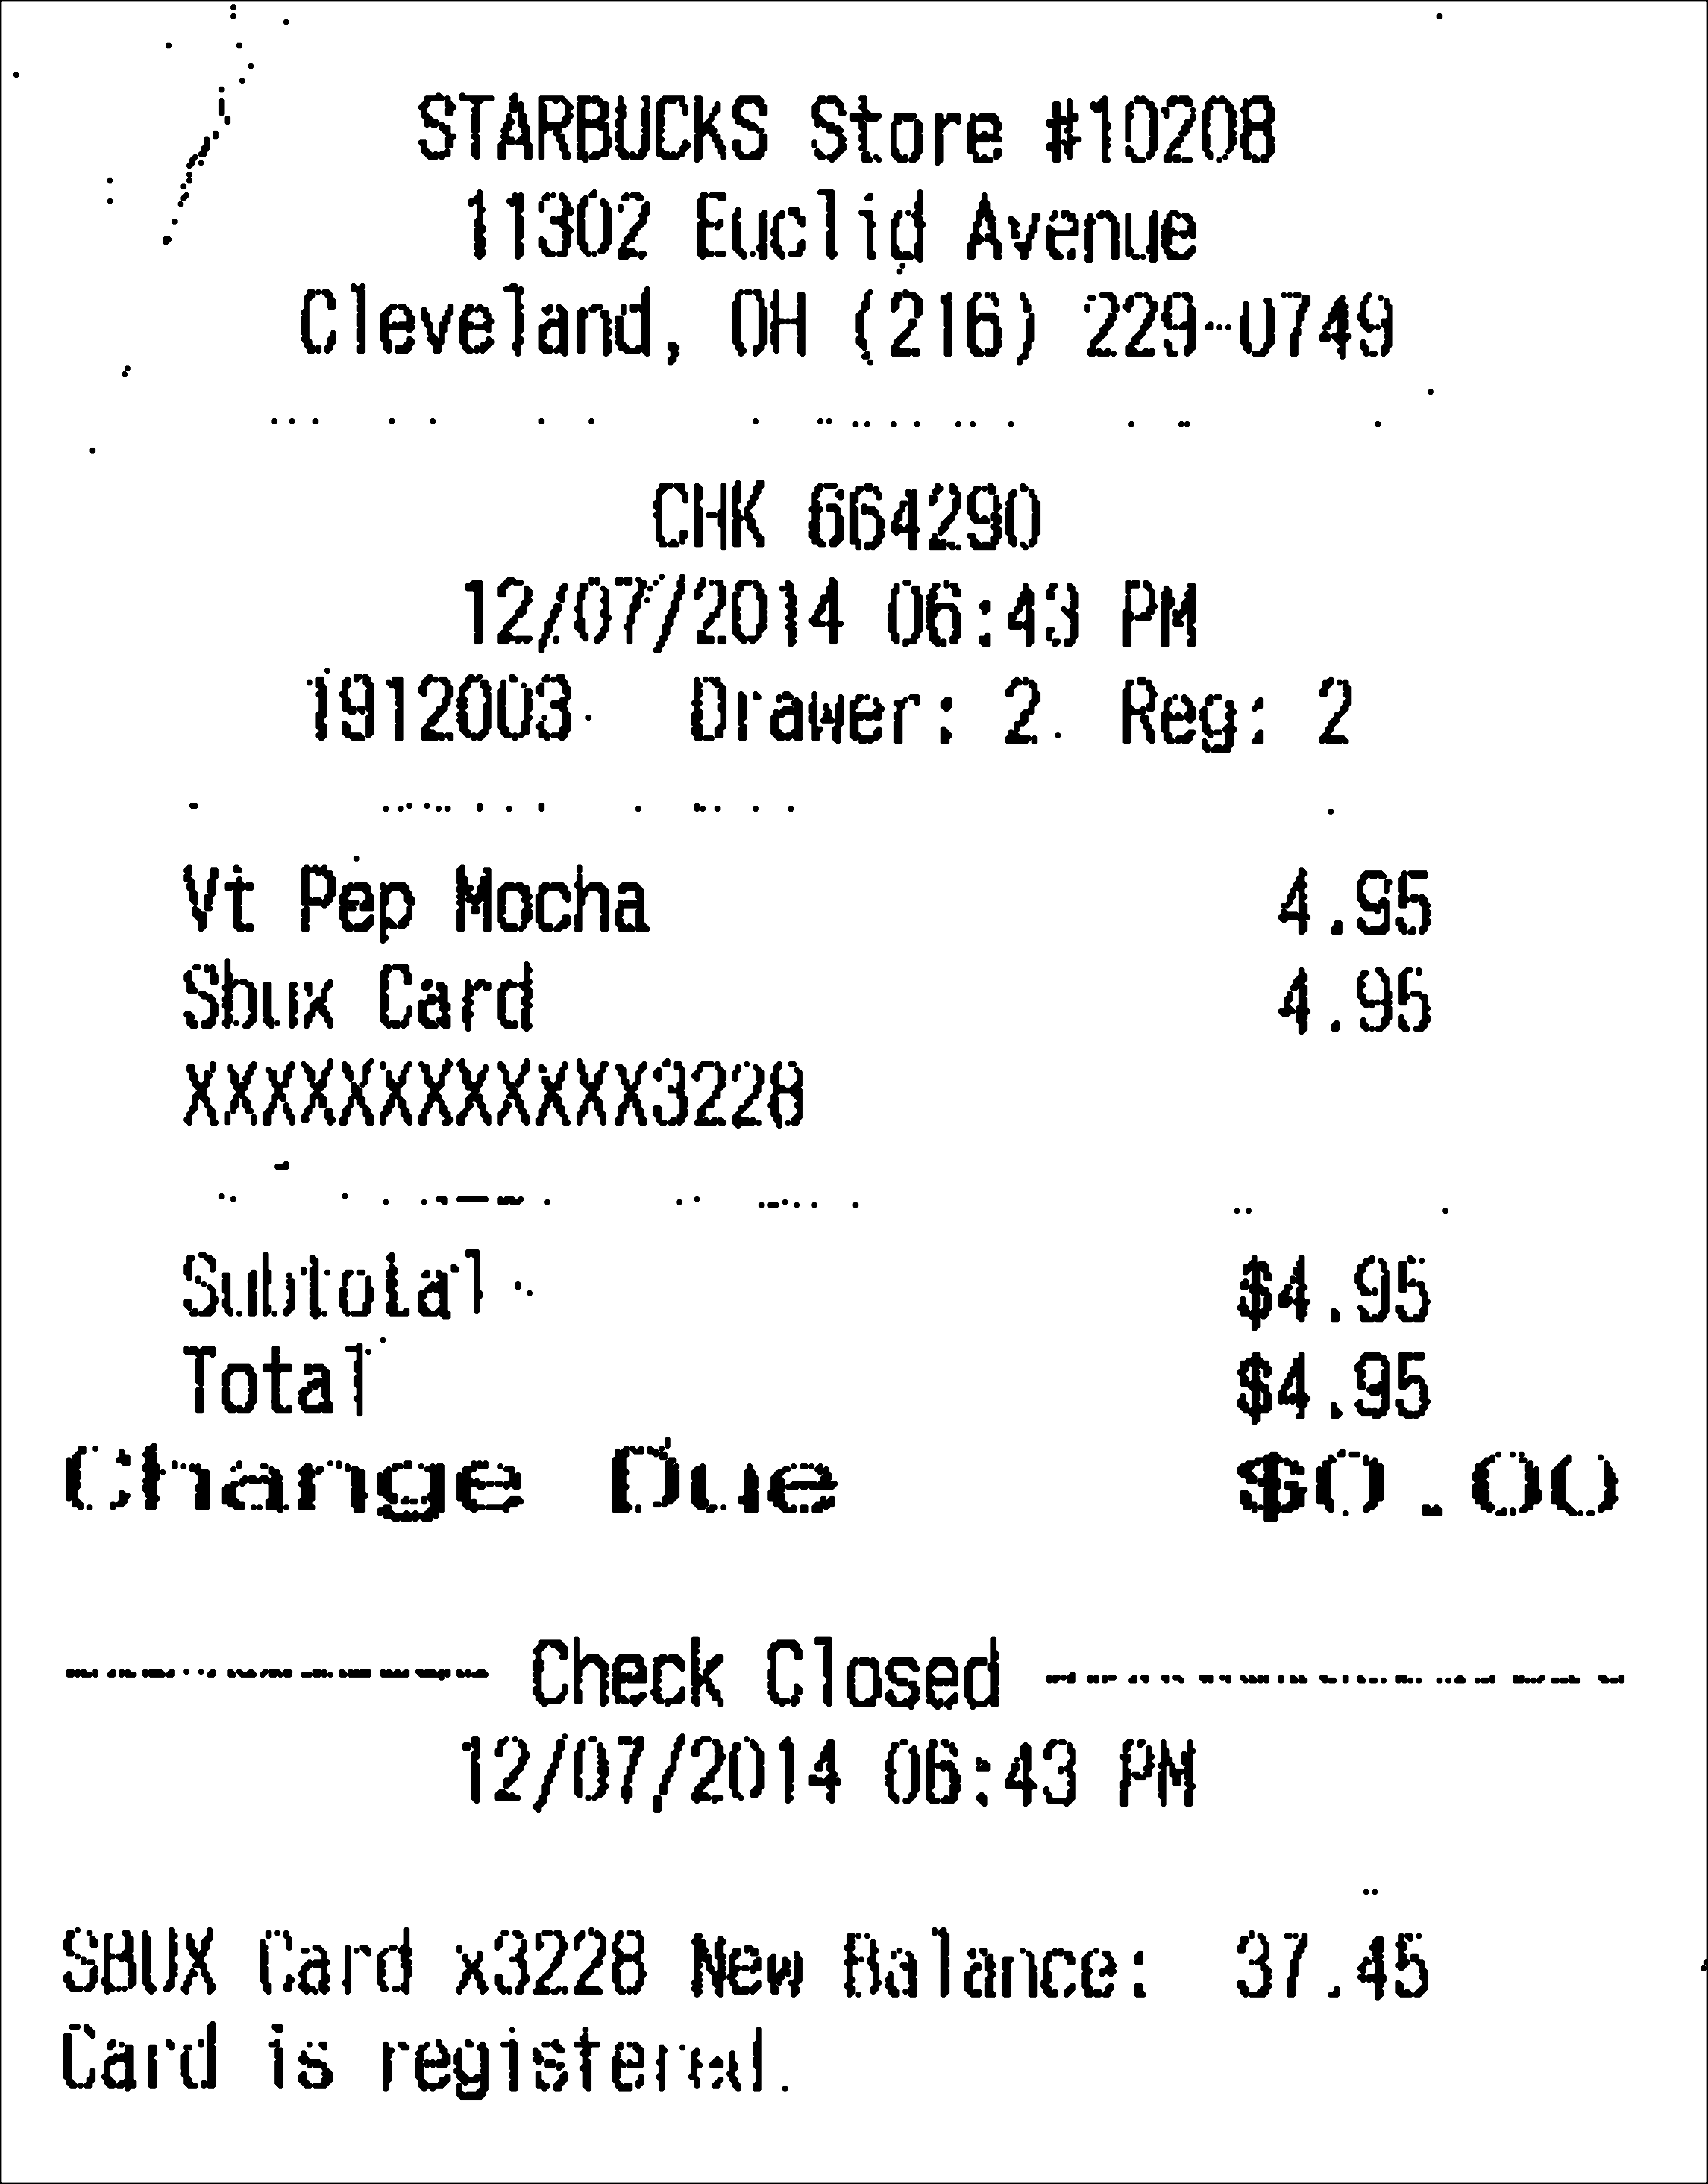

In [12]:
multiple_image = visual.GPUImageTransformer() \
    .addScalingTransform(8) \
    .addOtsuTransform() \
    .addErodeTransform(3, 3) \
    .setInputCol("image") \
    .setOutputCol("multiple_image") \
    .transform(image_df)

visual.display_images(multiple_image, "multiple_image")